In [1]:
import numpy as np 
import pandas as pd 

import matplotlib.pyplot as plt 
from mpl_toolkits.mplot3d import Axes3D

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

from keras.models import Sequential
from keras.layers import Dense
from keras import metrics

Using TensorFlow backend.


In [2]:
df = pd.read_csv('G:/Software/Machine learning/Datasets/Weater/weatherAUS.csv')
print(df.shape)

(142193, 24)


In [3]:
df.head(20)

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,0.0,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,0.0,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,0.0,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,1.0,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,0.2,No
5,2008-12-06,Albury,14.6,29.7,0.2,NaN,NaN,WNW,56.0,W,...,23.0,1009.2,1005.4,NaN,NaN,20.6,28.9,No,0.0,No
6,2008-12-07,Albury,14.3,25.0,0.0,NaN,NaN,W,50.0,SW,...,19.0,1009.6,1008.2,1.0,NaN,18.1,24.6,No,0.0,No
7,2008-12-08,Albury,7.7,26.7,0.0,NaN,NaN,W,35.0,SSE,...,19.0,1013.4,1010.1,NaN,NaN,16.3,25.5,No,0.0,No
8,2008-12-09,Albury,9.7,31.9,0.0,NaN,NaN,NNW,80.0,SE,...,9.0,1008.9,1003.6,NaN,NaN,18.3,30.2,No,1.4,Yes
9,2008-12-10,Albury,13.1,30.1,1.4,NaN,NaN,W,28.0,S,...,27.0,1007.0,1005.7,NaN,NaN,20.1,28.2,Yes,0.0,No


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 142193 entries, 0 to 142192
Data columns (total 24 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           142193 non-null  object 
 1   Location       142193 non-null  object 
 2   MinTemp        141556 non-null  float64
 3   MaxTemp        141871 non-null  float64
 4   Rainfall       140787 non-null  float64
 5   Evaporation    81350 non-null   float64
 6   Sunshine       74377 non-null   float64
 7   WindGustDir    132863 non-null  object 
 8   WindGustSpeed  132923 non-null  float64
 9   WindDir9am     132180 non-null  object 
 10  WindDir3pm     138415 non-null  object 
 11  WindSpeed9am   140845 non-null  float64
 12  WindSpeed3pm   139563 non-null  float64
 13  Humidity9am    140419 non-null  float64
 14  Humidity3pm    138583 non-null  float64
 15  Pressure9am    128179 non-null  float64
 16  Pressure3pm    128212 non-null  float64
 17  Cloud9am       88536 non-null

In [5]:
df.isnull().sum()

Date                 0
Location             0
MinTemp            637
MaxTemp            322
Rainfall          1406
Evaporation      60843
Sunshine         67816
WindGustDir       9330
WindGustSpeed     9270
WindDir9am       10013
WindDir3pm        3778
WindSpeed9am      1348
WindSpeed3pm      2630
Humidity9am       1774
Humidity3pm       3610
Pressure9am      14014
Pressure3pm      13981
Cloud9am         53657
Cloud3pm         57094
Temp9am            904
Temp3pm           2726
RainToday         1406
RISK_MM              0
RainTomorrow         0
dtype: int64

In [6]:
dataset = df[['Date' , 'Location' , 'MinTemp' , 'MaxTemp' , 'Temp3pm']]

In [7]:
dataset.head()

,Date,Location,MinTemp,MaxTemp,Temp3pm
0,2008-12-01,Albury,13.4,22.9,21.8
1,2008-12-02,Albury,7.4,25.1,24.3
2,2008-12-03,Albury,12.9,25.7,23.2
3,2008-12-04,Albury,9.2,28.0,26.5
4,2008-12-05,Albury,17.5,32.3,29.7


In [8]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 142193 entries, 0 to 142192
Data columns (total 5 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   Date      142193 non-null  object 
 1   Location  142193 non-null  object 
 2   MinTemp   141556 non-null  float64
 3   MaxTemp   141871 non-null  float64
 4   Temp3pm   139467 non-null  float64
dtypes: float64(3), object(2)
memory usage: 5.4+ MB


In [9]:
dataset.shape

(142193, 5)

In [10]:
dataset.isnull().sum()

Date           0
Location       0
MinTemp      637
MaxTemp      322
Temp3pm     2726
dtype: int64

In [11]:
dataset = dataset.dropna()
dataset.shape

(138994, 5)

In [12]:
Tmax = np.array([df.iloc[:,3]])
Tmin = np.array([df.iloc[:,2]])
Tavgat3 =  np.array([df.iloc[:,4]])

In [13]:
Tmax

array([[22.9, 25.1, 25.7, ..., 25.3, 26.9, 27. ]])

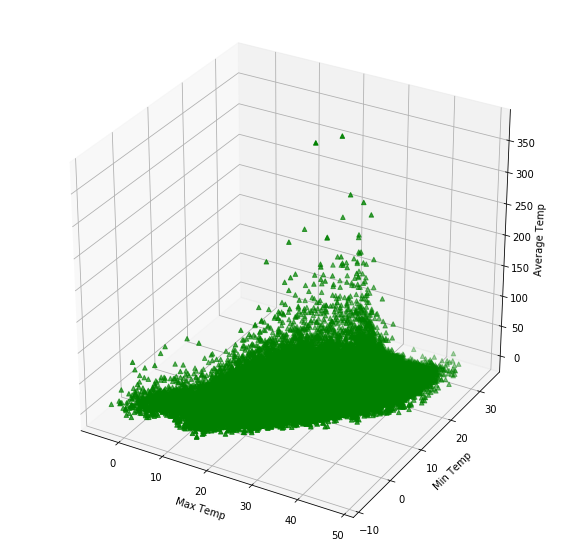

In [14]:
fig= plt.figure(figsize = (10 , 10))
ax = fig.add_subplot(111 , projection = '3d')
ax.scatter(Tmax , Tmin , Tavgat3 , marker = '^' , color = 'green')
ax.set_xlabel('Max Temp')
ax.set_ylabel('Min Temp')
ax.set_zlabel('Average Temp')
plt.show(block = False)

In [15]:
Temp = np.concatenate([Tmax , Tmin] , axis=0)
Temp

array([[22.9, 25.1, 25.7, ..., 25.3, 26.9, 27. ],
       [13.4,  7.4, 12.9, ...,  3.6,  5.4,  7.8]])

In [16]:
# print(Temp.shape)
Temp = np.transpose(Temp)
Tavgat3 = np.transpose(Tavgat3)

In [17]:
scaler = MinMaxScaler()
scaler.fit(Temp)
Temp = scaler.transform(Temp)

In [18]:
scaler.fit(Tavgat3)
Tavgat3 = scaler.transform(Tavgat3)
Tavgat3

array([[0.00161725],
       [0.        ],
       [0.        ],
       ...,
       [0.        ],
       [0.        ],
       [0.        ]])

In [19]:
X_train , X_test, Y_train, Y_test = train_test_split(Temp , Tavgat3 , test_size = 0.3)

In [20]:
model = Sequential()

model.add(Dense(32,activation = 'relu', input_dim = 2))
model.add(Dense(32,activation = 'relu'))
model.add(Dense(1,activation = 'sigmoid',))

model.compile(loss ='mean_squared_error' , optimizer = 'adam', metrics = [metrics.mae])

model.fit (X_train , Y_train , epochs = 100 , batch_size = 32 , verbose = 2)

Epoch 1/100


InternalError:  Blas GEMM launch failed : a.shape=(32, 2), b.shape=(2, 32), m=32, n=32, k=2
	 [[node dense_1/MatMul (defined at C:\Users\Mahmudur Limon\Anaconda3\envs\gputest\lib\site-packages\keras\backend\tensorflow_backend.py:3009) ]] [Op:__inference_keras_scratch_graph_891]

Function call stack:
keras_scratch_graph


In [ ]:
predict = model.predict(X_test , verbose = 1)

In [ ]:
plt.figure(figsize = (10 , 10))
plt.scatter(Y_test,predict)
plt.show(block =False)

In [ ]:
plt.figure(figsize = (10 , 10))
Test= plt.plot(Y_test)
Predict = plt.plot(predict)
plt.legend([Predict,Test],["Predicted Data","Real Data"])
plt.show()